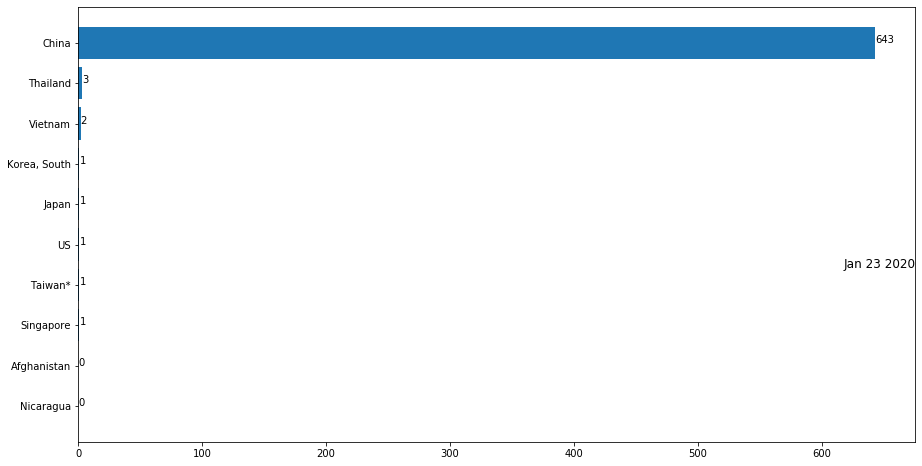

In [15]:
import pandas as pd
from datetime import timedelta

import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.animation as animation
from IPython.display import HTML

df = pd.read_csv('data.csv', usecols=['Country','Date','Count'])
df['Date']= pd.to_datetime(df['Date']) 
df = df.fillna(0)
df['Count']=df['Count'].astype(int)


fig, ax = plt.subplots(figsize=(15, 8))
colors = dict(zip(
        ['China', 'Italy', 'US', 'Iran',
         'France', 'South Korea', 'Canada'],
        ['#adb0ff', '#ffb3ff', '#90d595', '#e48381',
         '#aafbff', '#f7bb5f', '#eafb50']
    ))

def draw_barchart(xday):
    curr_date= pd.to_datetime('2020-01-22') + timedelta(xday)
    dff = (df[df['Date'].eq(curr_date)]).sort_values(by='Count', ascending=False).head(10)
    ax.clear()    

    dff = dff[::-1]
    ax.barh(dff['Country'], dff['Count'])

    for i, (count, country) in enumerate(zip(dff['Count'], dff['Country'])):
        #ax.text(count, i, country, ha='right')
        ax.text(count, i, count, ha='left')
    ax.text(1, 0.4, curr_date.strftime("%b %d %Y"), transform=ax.transAxes, size=12, ha='right')


#draw_barchart(0)
animator = animation.FuncAnimation(fig, draw_barchart, frames=range(1, 65))
HTML(animator.to_jshtml()) 